<a href="https://colab.research.google.com/github/manasarthak/Emotion-classification-using-physiological-signal/blob/main/plotting_selected_channels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.5 MB 26.2 MB/s 


In [4]:
from IPython.utils import io
import numpy as np
import collections

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.utils import shuffle

import scipy.io
from scipy import signal,integrate
import matplotlib.pyplot as plt

import keras
from keras.models import Model
from keras.layers import Input,Dense,LSTM,Dropout

import mne 
import math

import pickle

In [5]:
pyt=pickle.load(open('/content/drive/MyDrive/DEAP/s01.dat','rb'),encoding='latin1')
#taking only 32 channels(eeg ones) into account #disregarding the first three seconds of each trial
data=pyt['data'][:,0:32,3*128:]
labels=pyt['labels'][:,:3]
single_data=data[29]

#changing to mne format('biosemi32' used in the dataset)
biosemi32_format=mne.channels.make_standard_montage('biosemi32')
#create a basic info instance suitable to use with create_raw
info=mne.create_info(ch_names=biosemi32_format.ch_names, ch_types='eeg',sfreq=128)
#for evoked data of the first trial
raw=mne.EvokedArray(single_data,info)

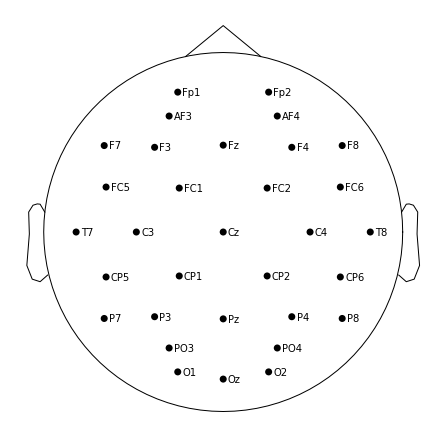

In [6]:
biosemi32_format.plot(kind='topomap',show_names=True);

In [7]:
raw.info['bads']=['Fp1','AF3','F3','F7','CP1','Pz','Fp2','AF4','Fz','FC6','P4','PO4'];

<Figure size 432x288 with 0 Axes>

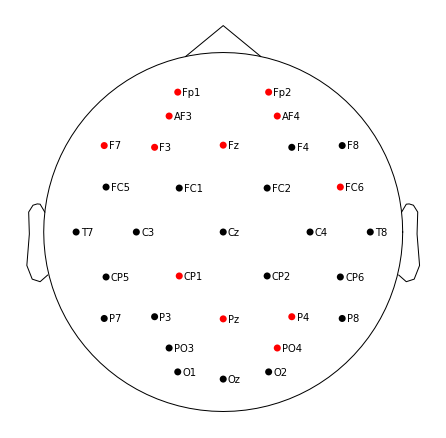

In [8]:
from mpl_toolkits.mplot3d import Axes3D
raw=raw.set_montage(biosemi32_format)
fig = plt.figure()
raw.plot_sensors(ch_type='eeg',show_names=True);

In [9]:
names=['Fp1', 'AF3' ,'F3' ,'F7' ,'FC5', 'FC1' ,'C3' ,'T7' ,'CP5' ,'CP1' ,'P3' ,'P7' ,'PO3' ,'O1' ,'Oz' ,'Pz' ,'Fp2','AF4', 'Fz', 'F4', 'F8', 'FC6', 'FC2', 'Cz', 'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']

In [12]:
mask=[True,True,True,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,True,True,False];
mask=np.array(mask);

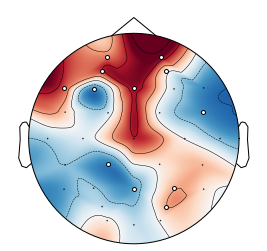

In [21]:
raw=raw.set_montage(biosemi32_format)
mne.viz.plot_topomap(raw.data[:,10],raw.info,mask=mask,res=4320);

No projector specified for this dataset. Please consider the method self.add_proj.


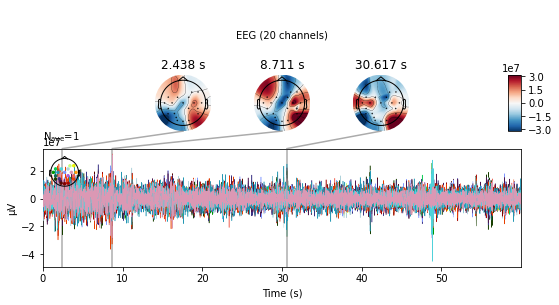

In [18]:
times=np.arange(15.01,15.21,0.01)
raw.plot_joint(picks='eeg');